In [1]:
import pandas as pd
import requests
import io

In [16]:
!pip install meteostat

In [2]:
from meteostat import Point, Daily, Hourly, Stations, 
from datetime import datetime

#Turlock lat/lon
lat = 37.494656
lon = -120.846596

# Create a Stations object and find nearby stations
stations = Stations()
nearby_stations = stations.nearby(lat, lon)

# Fetch the data of nearby stations
stations_data = nearby_stations.fetch()
df = stations_data
# stations_data['name']

# Word to search for
word = 'merced'

# Search for the word in 'column_name'
contains_word = df['name'].str.contains(word, case=False, na=False)

# Filter rows where 'column_name' contains the word
filtered_df = df[contains_word]

filtered_df

station_id = KMCE0

SyntaxError: trailing comma not allowed without surrounding parentheses (3173788073.py, line 1)

In [81]:
from datetime import datetime
from meteostat import Hourly

start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

data = Daily('KMCE0', start=start, end=end)
coverage = data.coverage()

data = data.fetch()
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,9.3,1.1,17.8,0.0,NaN,NaN,2.8,NaN,NaN,NaN
2018-01-02,9.8,5.6,15.6,0.0,NaN,NaN,2.2,NaN,1021.6,NaN
2018-01-03,9.5,5.0,14.4,NaN,NaN,NaN,6.1,NaN,1017.8,NaN
2018-01-04,13.0,7.8,20.0,6.2,NaN,NaN,11.1,NaN,1019.0,NaN
2018-01-05,14.9,7.2,21.7,0.0,NaN,NaN,6.5,NaN,1021.4,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-26,6.7,0.6,12.8,0.0,NaN,NaN,2.1,NaN,1019.7,NaN
2018-12-27,7.4,0.6,14.4,0.0,NaN,NaN,18.7,NaN,NaN,NaN
2018-12-28,5.7,1.1,11.7,0.0,NaN,NaN,8.1,NaN,1022.6,NaN


In [ ]:
x = 20200501
formatted_x = 

In [82]:
data['tmin'] = data['tmin'].apply(lambda x: (x * (9/5)) + 32)
data['tmax'] = data['tmax'].apply(lambda x: x* (9/5) + 32)

In [83]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,9.3,33.98,64.04,0.0,NaN,NaN,2.8,NaN,NaN,NaN
2018-01-02,9.8,42.08,60.08,0.0,NaN,NaN,2.2,NaN,1021.6,NaN
2018-01-03,9.5,41.00,57.92,NaN,NaN,NaN,6.1,NaN,1017.8,NaN
2018-01-04,13.0,46.04,68.00,6.2,NaN,NaN,11.1,NaN,1019.0,NaN
2018-01-05,14.9,44.96,71.06,0.0,NaN,NaN,6.5,NaN,1021.4,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-26,6.7,33.08,55.04,0.0,NaN,NaN,2.1,NaN,1019.7,NaN
2018-12-27,7.4,33.08,57.92,0.0,NaN,NaN,18.7,NaN,NaN,NaN
2018-12-28,5.7,33.98,53.06,0.0,NaN,NaN,8.1,NaN,1022.6,NaN


<Axes: xlabel='time'>

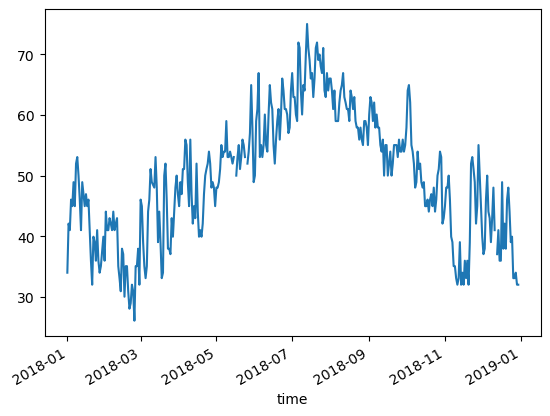

In [87]:
data['tmin'].plot()

In [5]:
from meteostat import Stations, Daily, Hourly
from datetime import datetime
import pytz


class GatherWeatherConditons():
    def __init__(self,  start_date, end_date, time_steps, station_id='KMCE0'):
        self.station_id = station_id #set for Merced by default
        self.start_date = start_date #YYYYMMDD
        self.end_date = end_date #YYYYMMDD
        self.time_steps = time_steps #DAILY, HOURLY, 15MIN, 5MIN
        
        
    def get_data(self):
        
        #format times for meteostat w/ datetime
        start_date = datetime.strptime(str(self.start_date), '%Y%m%d')
        end_date = datetime.strptime(str(self.end_date), '%Y%m%d')
        
        #daily
        if self.time_steps == 'DAILY':
            data = Daily(self.station_id, start_date, end_date)
            return data.fetch()
        
        #all other granularities use hourly
        data = Hourly(self.station_id, start_date, end_date)
        data = data.fetch()

        #hourly
        if self.time_steps == 'HOURLY':
            return data
        
        #15m 
        elif self.time_steps == '15MIN':
            return self.interpolate_data(data)
        
        #5m
        else:
            return self.interpolate_data(data)
                   
    def interpolate_data(self, hourly_data):
        #resample data
        if self.time_steps == '15MIN':
            resampled_data = hourly_data.resample('15T').asfreq()
        else:
            resampled_data = hourly_data.resample('5T').asfreq()
            
        #interpolate missing values linearly 
        interpolated_data = resampled_data.interpolate(method='linear')

        return interpolated_data
    
    
    def clean_df(self, df):
        
        
        if self.time_steps == 'DAILY':
            
            #drop unncessary columns
            df.drop(columns=['prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres','tsun'], inplace=True)
            
            #convert to F, DAILY has 'tavg', 'tmin', 'tmax'
            df[df.columns] = df[df.columns] * 9/5 + 32 
            
            return df
        
        else:
            df.drop(columns=['dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres','tsun', 'coco'],inplace=True)
            
            #convert to F
            df['temp'] = df['temp'] * 9/5 + 32
            
            return df
        
    def convert_UTC_to_PST(self, df):
        utc = pytz.utc
        pst = pytz.timezone('America/Los_Angeles')
        df.index = df.index.tz_localize(utc).tz_convert(pst)
        df.index = df.index.tz_localize(None)
        return df
    
    def fetch_and_process_data(self):
        data = self.get_data()
        clean_data = self.clean_df(data)
        return self.convert_UTC_to_PST(clean_data)

In [13]:
weather = GatherWeatherConditons(20220608,20220612,time_steps='HOURLY')
df = weather.fetch_and_process_data()
df

,temp
time,
2022-06-07 17:00:00,91.94
2022-06-07 18:00:00,89.06
2022-06-07 19:00:00,84.92
2022-06-07 20:00:00,84.92
2022-06-07 21:00:00,75.02
...,...
2022-06-11 13:00:00,100.04
2022-06-11 14:00:00,100.04
2022-06-11 15:00:00,102.02


In [211]:
weather2 = GatherWeatherConditons(2018701,20180731,time_steps='HOURLY')
df = weather2.get_data()
# df[df.columns] = df[df.columns]*9/5 + 32
# df
df

,temp
time,
2018-07-01 00:00:00,96.98
2018-07-01 01:00:00,96.98
2018-07-01 02:00:00,95.00
2018-07-01 03:00:00,91.94
2018-07-01 04:00:00,87.08
...,...
2018-07-30 20:00:00,87.98
2018-07-30 21:00:00,89.96
2018-07-30 22:00:00,91.04


<Axes: xlabel='time'>

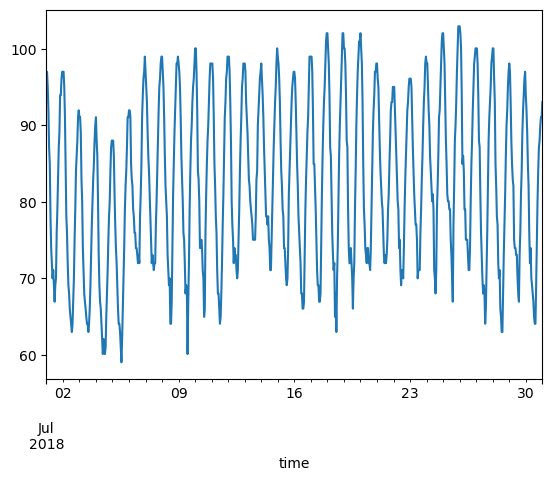

In [212]:
df['temp'].plot()

In [183]:
columns = df.columns
columns

Index(['temp'], dtype='object')

In [115]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Get daily data
data = Hourly('10637', start, end)
data = data.fetch()

data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2018-01-01 00:00:00,11.3,5.4,67.0,0.0,NaN,220.0,33.1,NaN,1003.6,NaN,NaN
2018-01-01 01:00:00,10.8,4.5,65.0,0.0,NaN,210.0,31.0,NaN,1003.9,NaN,NaN
2018-01-01 02:00:00,10.5,3.5,62.0,0.0,NaN,210.0,31.3,NaN,1004.9,NaN,NaN
2018-01-01 03:00:00,10.0,3.3,63.0,0.0,NaN,220.0,29.5,NaN,1005.2,0.0,NaN
2018-01-01 04:00:00,9.6,3.1,64.0,0.0,NaN,220.0,29.2,NaN,1005.2,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30 20:00:00,6.6,3.6,81.0,0.0,NaN,240.0,14.4,23.0,1034.3,0.0,7.0
2018-12-30 21:00:00,6.3,3.8,84.0,0.0,NaN,240.0,12.2,18.0,1033.9,0.0,7.0
2018-12-30 22:00:00,6.2,3.9,85.0,0.0,NaN,220.0,12.2,21.0,1033.5,0.0,7.0


In [88]:
!pip install pytz

In [89]:
import pytz
from datetime import datetime

# Your original timestamp in UTC
utc_time_str = "20230416T00:00-0000"

# Parse the string into a datetime object
utc_time = datetime.strptime(utc_time_str, "%Y%m%dT%H:%M%z")

# Define the Pacific timezone
pacific = pytz.timezone("America/Los_Angeles")

# Convert the time to Pacific Time
pacific_time = utc_time.astimezone(pacific)

print(pacific_time.strftime("%Y-%m-%d %H:%M %Z%z"))


2023-04-15 17:00 PDT-0700


https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid={API key}

In [12]:
url

'https://history.openweathermap.org/data/2.5/history/city?lat=37.494656&lon=-120.846596&type=hour&start=1369728000&end=1369789200&appid=1187181787bddd91ce65bd73513b9def'

In [ ]:
# 12